# **Telecom Churn Case Study**

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.




In [0]:
# Loading Packages
import numpy as np
import pandas as pd                     # For mathematical calculations              
import matplotlib.pyplot as plt         # For plotting graphs 
import seaborn as sns                   # For visualizations
#import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')       # To ignore any warnings
%matplotlib inline

## **Reading and Understanding the data :**

In [5]:
# Getting the system ready and loading the data
path="/telecom_churn_data.csv"
telecom= pd.read_csv(path)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
telecom.shape

(99999, 226)

In [7]:
# we will check which features present in our telecom data
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
# Check the dataframe info
telecom.info(226)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [11]:
telecom.describe()   # overview the statitics

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [12]:
# Check if there are any duplicate rows
telecom.duplicated().sum()

0

In [13]:
# Check for columns having one unique value
unique = pd.DataFrame(telecom.nunique()).reset_index().rename(columns={'index':'columns',0:'unique_count'})
unique.head()


,columns,unique_count
0,mobile_number,99999
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1


In [14]:
cols_with_one_uniq_val = unique[unique['unique_count'] == 1]['columns'].tolist()
cols_with_one_uniq_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

## Data Cleaning :




**Handle missing values:**

,Total,Percent
count_rech_2g_6,74846,0.748467
date_of_last_rech_data_6,74846,0.748467
count_rech_3g_6,74846,0.748467
av_rech_amt_data_6,74846,0.748467
max_rech_data_6,74846,0.748467


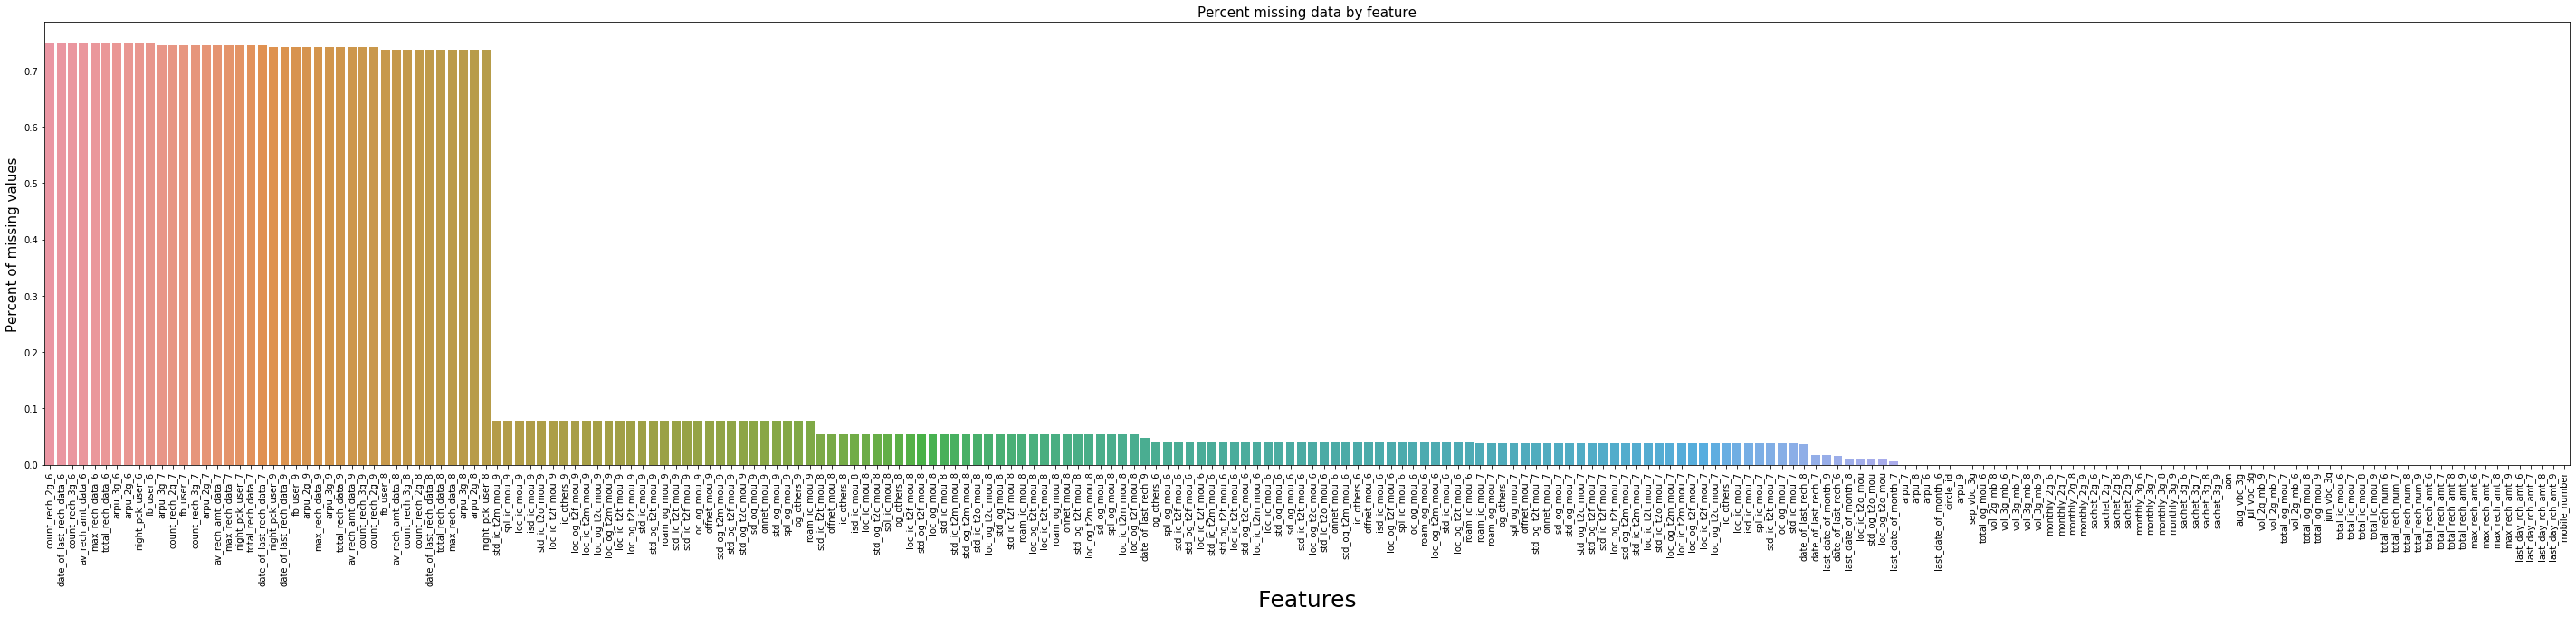

In [15]:
# Potting the graph for missing values status
total = telecom.isnull().sum().sort_values(ascending=False)
percent = (telecom.isnull().sum()/telecom.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(50, 9))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=25)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [16]:
# checked the missing value %
def missing_values(telecom):
  print(round(telecom.isnull().sum()*100/(len(telecom)),2).sort_values(ascending= False))
    
missing_values(telecom)


count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64


It could be seen that a lot of columns are having more than 74% missing values. We will remove the columns having high null values except the ones that will be used for identification of high value customers.

In [17]:
telecom.shape

(99999, 226)

In [18]:
missing_df = pd.DataFrame(round(telecom.isnull().sum()/len(telecom.index),2)).reset_index().rename(columns={'index':'columns',0:'Null Percentage'})
missing_df.sort_values(['Null Percentage'],ascending=False)

,columns,Null Percentage
189,arpu_3g_6,0.75
177,av_rech_amt_data_6,0.75
157,date_of_last_rech_data_6,0.75
161,total_rech_data_6,0.75
165,max_rech_data_6,0.75
...,...,...
146,max_rech_amt_7,0.00
145,max_rech_amt_6,0.00
144,total_rech_amt_9,0.00
143,total_rech_amt_8,0.00


In [19]:
cols_having_high_null_val = missing_df[missing_df['Null Percentage'] >= 0.74]['columns'].tolist()
cols_having_high_null_val

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [20]:
cols_to_retain = ['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']
cols_to_drop = [i for i in cols_having_high_null_val if i not in cols_to_retain]
cols_to_drop

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [21]:
telecom = telecom.drop(cols_to_drop,axis=1)
telecom.shape

(99999, 190)

In [22]:
missing_values(telecom)

av_rech_amt_data_6    74.85
total_rech_data_6     74.85
av_rech_amt_data_7    74.43
total_rech_data_7     74.43
loc_ic_t2t_mou_9       7.75
                      ...  
last_day_rch_amt_6     0.00
last_day_rch_amt_7     0.00
last_day_rch_amt_8     0.00
last_day_rch_amt_9     0.00
mobile_number          0.00
Length: 190, dtype: float64


In [0]:
# Imputing the rest of the missing values with 0
telecom.fillna(value=0,inplace=True)

In [24]:
telecom.isnull().any().sum()

0

In [25]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,7/31/2014,8/31/2014,9/30/2014,30,50,50,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,7/28/2014,8/9/2014,9/28/2014,50,110,110,50,1.0,0.0,56.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [0]:
# Removing columns with only one unique value
telecom = telecom.drop(cols_with_one_uniq_val,axis=1)

In [27]:
telecom.shape

(99999, 174)

In [28]:
#columns with date fields
date_cols = telecom.columns[telecom.columns.str.contains('date')].tolist()
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [29]:
# Removing date columns as they won't play any role in churn prediction
telecom = telecom.drop(date_cols,axis=1)
telecom.shape

(99999, 170)

In [30]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,252,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,...,154,65,50,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,...,200,86,100,0,200,86,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,...,50,50,50,30,50,50,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,...,110,110,50,50,110,110,50,1.0,0.0,56.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [31]:
# Remove mobile_number which have no impact on churn
telecom = telecom.drop('mobile_number',1)
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,...,154,65,50,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,...,200,86,100,0,200,86,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,...,50,50,50,30,50,50,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,...,110,110,50,50,110,110,50,1.0,0.0,56.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


**Derive New Features:**

In [32]:
# Derived Column 1: Average Revenue Per Person in Good Months (numerical)
telecom['arpu_goodmonths']=(telecom['arpu_6']+telecom['arpu_7'])/2
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,206.1005
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,...,65,50,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,194.5605
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,...,86,100,0,200,86,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00,178.3740
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,...,50,50,30,50,50,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00,236.2200
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,...,110,50,50,110,110,50,1.0,0.0,56.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00,285.7560


In [33]:
#Derived Column 2: Minutes of Call in Good Months (numerical)   
telecom['mins_call']=telecom['loc_og_t2c_mou_6']+telecom['loc_og_t2c_mou_7']
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,206.1005,0.00
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,...,50,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,194.5605,2.91
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,...,100,0,200,86,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00,178.3740,135.54
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,...,50,30,50,50,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00,236.2200,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,...,50,50,110,110,50,1.0,0.0,56.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00,285.7560,0.00


In [34]:
#Derived Column 3: Customer Group based on Age on Network (categorical)
old = telecom['aon'].quantile(0.75)
mid = telecom['aon'].mean()
new = telecom['aon'].quantile(0.25)

def age_on_network(x):
    if x >= old:
        cust_grp = 'Very Old'
    elif x >= mid and x < old :
        cust_grp = 'Old'
    elif x >= new and x < mid:
        cust_grp = 'New'
    else:
        cust_grp = 'Just Joined'
    return cust_grp

telecom['cust_group'] = telecom['aon'].apply(age_on_network)
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,cust_group
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,206.1005,0.00,New
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,...,44,23,30,0,0.0,1.0,0.0,154.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,194.5605,2.91,New
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,...,0,200,86,0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00,178.3740,135.54,New
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,...,30,50,50,30,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00,236.2200,0.00,Very Old
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,...,50,110,110,50,1.0,0.0,56.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00,285.7560,0.00,Old


In [35]:
telecom['cust_group'].value_counts()

New            37965
Very Old       25000
Just Joined    24927
Old            12107
Name: cust_group, dtype: int64

**Filter high-value customers:**

In [0]:
telecom['total_amt_rech_6_7']= telecom[["total_rech_amt_6","total_rech_amt_7"]].sum(axis=1)
telecom['total_rech_data_6_7']= telecom[["total_rech_data_6","total_rech_data_7"]].sum(axis=1)
telecom['avg_rech_goodMonths'] = (telecom['total_amt_rech_6_7']+telecom['total_rech_data_6_7'])/2

In [0]:
#Filter high-value customers(70%)
high_value_cust= telecom[(telecom.avg_rech_goodMonths) >= round(telecom.avg_rech_goodMonths.quantile(.70))]

In [38]:
high_value_cust.shape

(29991, 175)

In [39]:
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,cust_group,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,0.0,New,2370,0.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,...,0,0.0,2.0,0.0,177.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0.0,Just Joined,1038,2.0,520.0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0.0,Very Old,760,0.0,380.0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.0,0.0,0.00,0.0,315.91,215.64,205.93,233.04,...,220,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0.0,New,918,0.0,459.0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,97.54,0.00,0.00,45.79,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,354.4940,0.0,New,816,0.0,408.0


**Tag churners and remove attributes of the churn phase:**

In [0]:
high_value_cust['Churn'] = high_value_cust[['total_og_mou_9','total_ic_mou_9','vol_3g_mb_9',"vol_2g_mb_9"]].sum(axis=1)
high_value_cust['Churn'] = high_value_cust['Churn'].apply(lambda x: 1 if x ==0 else 0)


In [41]:
high_value_cust.Churn.value_counts()

0    27401
1     2590
Name: Churn, dtype: int64

In [42]:
# extract all names that end with 9
churn_cols_9 = high_value_cust.columns[high_value_cust.columns.str.contains('_9')].tolist()
churn_cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [43]:
#delete columns that relating to 9th month(churn month)
high_value_cust = high_value_cust.drop(churn_cols_9,axis=1)
high_value_cust.shape

(29991, 136)

In [44]:
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,cust_group,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,0.0,New,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0.0,Just Joined,1038,2.0,520.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,...,110,110,130,110,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0.0,Very Old,760,0.0,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,...,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0.0,New,918,0.0,459.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,...,110,0,30,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,354.4940,0.0,New,816,0.0,408.0,0


In [45]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Columns: 136 entries, arpu_6 to Churn
dtypes: float64(108), int64(27), object(1)
memory usage: 31.3+ MB


## **Exploratory Data Analysis(EDA)** 

In [46]:
high_value_cust.shape

(29991, 136)

In [47]:
high_value_cust_numeric = high_value_cust.select_dtypes(exclude=['object'])
high_value_cust_numeric.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,0.0,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,120,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0.0,1038,2.0,520.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,...,717,110,110,130,110,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0.0,760,0.0,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,...,160,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0.0,918,0.0,459.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,...,30,110,0,30,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,354.4940,0.0,816,0.0,408.0,0


In [48]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(high_value_cust_numeric, 10))

Top Absolute Correlations
total_amt_rech_6_7  avg_rech_goodMonths    0.999990
arpu_goodmonths     avg_rech_goodMonths    0.974491
                    total_amt_rech_6_7     0.974450
arpu_8              total_rech_amt_8       0.953738
isd_og_mou_7        isd_og_mou_8           0.941344
arpu_6              total_rech_amt_6       0.941239
arpu_7              total_rech_amt_7       0.937130
total_rech_data_7   total_rech_data_6_7    0.936375
total_rech_data_6   total_rech_data_6_7    0.921750
isd_og_mou_6        isd_og_mou_8           0.916080
dtype: float64


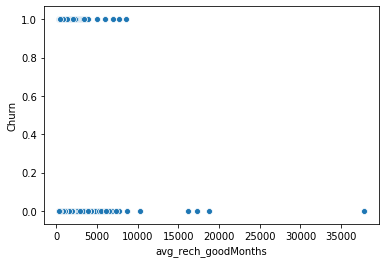

In [49]:
sns.scatterplot(high_value_cust['avg_rech_goodMonths'],high_value_cust['Churn'])
plt.show()

From the plot we can see thata when the recharge is more in the good months then there is less proabibility of churn.

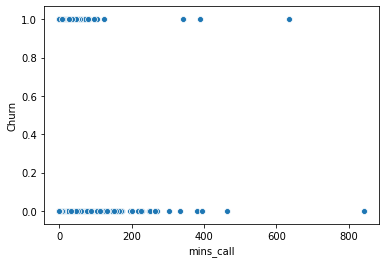

In [50]:
sns.scatterplot(high_value_cust['mins_call'],high_value_cust['Churn'])
plt.show()

Higher the total incoming minutes of usage during action phase lower is the probability of churn.

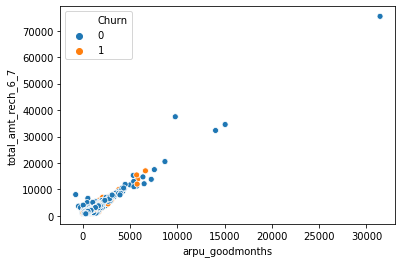

In [51]:
sns.scatterplot(high_value_cust['arpu_goodmonths'],high_value_cust['total_amt_rech_6_7'],hue=high_value_cust['Churn'])
plt.show()

Churn's are more likely to happen when the average revenue per user is less.

In [52]:
cust_grp_df = high_value_cust.groupby(['cust_group','Churn']).size().reset_index().rename(columns={0:'Number of Customers'})
cust_grp_df

,cust_group,Churn,Number of Customers
0,Just Joined,0,6145
1,Just Joined,1,923
2,New,0,10117
3,New,1,1163
4,Old,0,3542
5,Old,1,214
6,Very Old,0,7597
7,Very Old,1,290


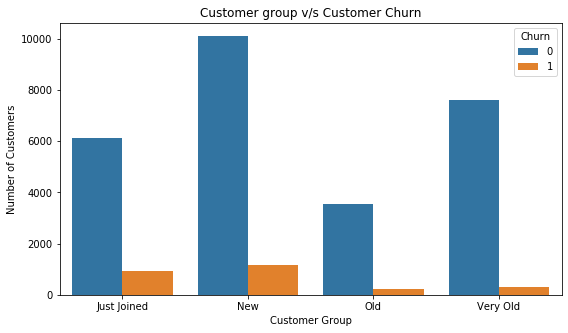

In [53]:
plt.figure(figsize=(9,5))
ax = sns.barplot(data=cust_grp_df,x='cust_group',y='Number of Customers',hue='Churn')
ax.set_title('Customer group v/s Customer Churn')
ax.set_xlabel('Customer Group')
ax.set_ylabel('Number of Customers')
# create_label(ax,'integer')
plt.show()

From the above plot we could see that the churn percentage is high for the customers who have just been associated with the provider. The churn percentage is lowest for the customers whose age on network is very large, they have grown a loyalty with the network and are less likely to leave.

In [54]:
high_value_cust.shape

(29991, 136)

## Data Preparation:

In [55]:
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,cust_group,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,0.0,New,2370,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0.0,Just Joined,1038,2.0,520.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,...,110,110,130,110,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0.0,Very Old,760,0.0,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,...,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0.0,New,918,0.0,459.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,...,110,0,30,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,354.4940,0.0,New,816,0.0,408.0,0


In [56]:
# Creating dummy variables for the categorical variable 'cust_group'
ml = pd.get_dummies(high_value_cust['cust_group'], prefix='cust_group',drop_first=True)

#Adding the results to the master dataframe
high_value_cust = pd.concat([high_value_cust,ml], axis=1)
high_value_cust = high_value_cust.drop('cust_group',1)
high_value_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,Churn,cust_group_New,cust_group_Old,cust_group_Very Old
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,0.0,2370,0.0,1185.0,1,1,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,30,50,0,10,0.0,2.0,0.0,177.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0.0,1038,2.0,520.0,0,0,0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,...,130,110,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0.0,760,0.0,380.0,0,0,0,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,...,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0.0,918,0.0,459.0,0,1,0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,...,30,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,354.4940,0.0,816,0.0,408.0,0,1,0,0


#### Dimensionality Reduction Using PCA :

In [57]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = high_value_cust.drop(['Churn'],axis=1)

# Putting response variable to y
y = high_value_cust['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int64

In [58]:
y.value_counts()/len(y.index)

0    0.913641
1    0.086359
Name: Churn, dtype: float64

Since the percentage of churn is very low we need to handle class imbalance later while model building.

In [0]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [60]:
X_train.shape

(20993, 137)

In [61]:
X_test.shape

(8998, 137)

In [62]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
12271,437.887,457.518,264.205,17.63,45.96,23.89,186.83,302.06,81.66,0.0,0.00,0.0,0.0,0.0,0.0,13.88,28.73,12.01,182.48,274.86,78.08,3.91,25.13,3.58,0.00,0.00,0.00,200.28,328.73,93.68,3.75,13.81,11.88,0.00,0.00,0.00,0.43,3.41,0.00,4.18,...,154,154,0,30,30,1.0,1.0,154.0,154.0,5.83,67.09,57.56,436.30,413.95,392.11,1,1,1,0,0,0,0,0,0,0,0,0,279,262.76,406.66,121.27,0.0,447.7025,0.00,1033,2.0,517.5,0,0,0
77283,785.752,508.494,205.349,1072.93,545.01,5.28,208.51,231.24,0.00,0.0,0.00,0.0,0.0,0.0,0.0,41.33,44.56,5.28,92.93,88.09,0.00,1.68,0.41,0.00,0.00,0.00,0.00,135.94,133.08,5.28,1031.59,500.44,0.00,101.13,114.68,0.00,12.76,28.04,0.00,1145.49,...,110,198,110,0,0,1.0,0.0,198.0,0.0,2161.32,0.00,1816.75,0.00,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,424,0.00,0.00,0.00,0.0,647.1230,0.00,1460,1.0,730.5,0,0,0
92584,351.736,414.404,436.444,85.09,166.19,102.86,491.99,435.14,690.19,0.0,0.88,0.0,0.0,0.8,0.0,11.91,19.26,38.71,142.48,231.83,247.11,0.00,0.00,1.46,6.08,0.61,4.96,154.39,251.09,287.29,73.18,146.13,64.14,340.38,202.61,429.43,0.00,0.00,7.21,413.56,...,110,144,0,0,0,4.0,2.0,92.0,46.0,0.49,0.00,1.77,0.00,0.00,0.00,0,0,0,4,2,3,0,0,0,0,0,0,613,0.00,0.00,0.00,0.0,383.0700,6.69,894,6.0,450.0,1,0,0
16605,186.724,441.290,522.521,452.83,596.73,445.38,34.19,111.53,115.26,0.0,0.00,0.0,0.0,0.0,0.0,452.83,596.73,437.24,29.86,103.13,108.08,1.71,8.39,4.24,4.24,0.00,0.00,484.41,708.26,549.58,0.00,0.00,8.13,0.76,0.00,2.93,0.00,0.00,0.00,0.76,...,154,154,30,70,50,1.0,2.0,25.0,187.0,77.83,121.43,50.07,817.22,304.99,1270.61,0,1,1,1,1,0,0,0,0,0,0,0,3034,897.56,279.93,845.28,20.5,314.0070,4.24,761,3.0,382.0,0,0,1
64173,320.832,481.248,280.676,29.58,87.91,17.56,265.28,351.48,221.73,0.0,0.00,0.0,0.0,0.0,0.0,29.58,87.91,17.56,228.76,315.49,167.56,0.00,0.38,1.21,0.61,0.00,0.00,258.34,403.79,186.34,0.00,0.00,0.00,35.89,26.03,22.16,0.00,9.56,30.78,35.89,...,30,20,10,20,10,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,783,0.00,0.00,0.00,0.0,401.0400,0.61,900,0.0,450.0,1,0,0


In [63]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
83339,1123.783,20.500,835.120,676.38,0.58,511.04,1334.13,4.44,1450.39,15.59,8.08,0.51,148.41,5.03,0.0,48.66,0.00,10.24,139.14,0.00,169.24,0.00,0.00,0.00,0.00,0.00,0.0,187.81,0.00,179.49,607.21,0.00,500.79,1056.41,0.00,1274.99,10.65,0.00,0.0,1674.28,...,0,169,128,0,130,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1299,0.00,0.00,0.00,0.00,572.1415,0.00,1233,0.0,616.5,0,1,0
68510,154.718,798.833,-43.170,0.00,0.00,0.00,19.88,91.48,0.53,4.96,0.00,0.00,1.89,0.00,0.0,0.00,0.00,0.00,1.33,14.16,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.33,14.16,0.00,0.00,0.00,0.00,15.06,77.31,0.53,0.00,0.00,0.0,15.06,...,455,250,229,455,250,0.0,1.0,0.0,455.0,0.0,19.74,0.0,0.0,243.72,0.0,0,0,0,0,0,0,0,1,0,0,0,0,245,1785.10,188.53,151.07,41.46,476.7755,0.00,913,1.0,457.0,0,0,0
92632,662.317,895.154,574.572,231.74,233.18,805.81,1351.64,2161.83,272.18,0.00,0.00,0.00,0.00,0.00,0.0,1.58,0.61,3.63,25.76,40.58,17.83,0.00,0.00,0.00,0.00,0.00,0.0,27.34,41.19,21.46,230.16,232.56,802.18,1325.88,2121.24,233.79,0.00,0.00,0.0,1556.04,...,110,130,110,0,99,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,306,0.00,0.00,0.00,0.00,778.7355,0.00,1932,0.0,966.0,0,0,0
78687,519.685,656.436,496.580,242.48,350.33,258.44,272.39,334.74,243.26,0.00,0.00,0.00,0.00,0.00,0.0,242.48,350.33,258.44,254.83,258.21,228.91,8.63,20.21,13.68,0.00,0.00,0.0,505.94,628.76,501.04,0.00,0.00,0.00,0.00,2.96,0.66,8.11,34.64,0.0,8.11,...,130,130,120,130,130,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,3651,0.00,0.00,0.00,0.00,588.0605,0.00,1430,0.0,715.0,0,0,1
93703,409.546,273.474,251.031,180.69,146.41,273.79,561.11,427.18,158.76,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.15,0.21,12.13,1.76,0.00,0.00,0.00,0.00,3.56,3.81,0.0,12.13,3.91,0.21,180.69,144.26,273.58,532.91,398.99,140.64,0.00,0.00,0.0,713.61,...,50,50,30,50,30,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,194,99.65,0.00,0.00,210.62,341.5100,7.37,788,0.0,394.0,0,0,0


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,-0.354294,-0.308665,-0.578787,-0.601652,-0.534860,-0.521335,-0.489266,-0.253146,-0.615708,-0.221567,-0.181399,-0.177109,-0.24537,-0.224166,-0.197032,-0.341358,-0.276417,-0.327442,0.003537,0.387144,-0.385253,-0.133197,0.774764,-0.140648,-0.247582,-0.193670,-0.227944,-0.218007,0.117183,-0.462175,-0.450231,-0.430036,-0.387276,-0.492098,-0.492349,-0.432665,-0.124470,0.109551,-0.160160,-0.641177,...,-0.113332,-0.043808,-0.734475,-0.532564,-0.447464,0.017664,-0.026952,0.340301,0.290035,-0.263275,-0.042107,-0.046384,0.218394,0.162247,0.143079,2.306917,2.209042,2.442513,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-1.011807,0.338777,0.660181,-0.005427,-0.133031,-0.373456,-0.251919,-0.399941,-0.006014,-0.399858,-0.775276,-0.376471,-0.600736
1,0.489221,-0.185431,-0.705682,1.681558,0.503425,-0.561263,-0.443207,-0.400011,-0.786413,-0.221567,-0.181399,-0.177109,-0.24537,-0.224166,-0.197032,-0.226728,-0.211448,-0.356732,-0.350704,-0.390264,-0.722391,-0.230678,-0.285379,-0.314954,-0.247582,-0.193670,-0.227944,-0.385199,-0.407135,-0.706317,2.052727,0.703013,-0.416093,-0.246065,-0.228083,-0.432665,0.872536,2.004985,-0.160160,1.241440,...,-0.356293,0.216790,0.042904,-0.746259,-0.652684,0.017664,-0.441457,0.579293,-0.498354,7.356559,-0.276744,6.291264,-0.312790,-0.328412,-0.316718,2.306917,-0.339003,2.442513,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-0.863342,-0.332141,-0.332283,-0.309935,-0.133031,0.170571,-0.251919,0.084648,-0.238961,0.083460,-0.775276,-0.376471,-0.600736
2,-0.563196,-0.412893,-0.207434,-0.455698,-0.284718,-0.351908,0.159041,0.022831,0.656385,-0.221567,-0.169157,-0.177109,-0.24537,-0.215748,-0.197032,-0.349585,-0.315284,-0.211238,-0.154694,0.208037,0.344591,-0.304117,-0.302962,-0.243868,0.734346,-0.128562,0.425936,-0.337256,-0.090883,0.072533,-0.281158,-0.121948,-0.260507,0.335991,-0.025459,0.590341,-0.159240,-0.152869,0.512892,0.034105,...,-0.356293,-0.103035,-0.734475,-0.746259,-0.652684,1.369362,0.387553,0.003541,-0.262861,-0.282153,-0.276744,-0.247373,-0.312790,-0.328412,-0.316718,-0.333567,-0.339003,-0.321227,1.990377,0.716927,1.275963,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-0.669826,-0.332141,-0.332283,-0.309935,-0.133031,-0.549776,0.251545,-0.557688,0.925773,-0.553022,1.289864,-0.376471,-0.600736
3,-0.963323,-0.347896,-0.021850,0.339932,0.611030,0.382958,-0.813547,-0.648262,-0.545470,-0.221567,-0.181399,-0.177109,-0.24537,-0.224166,-0.197032,1.491679,2.054765,1.523243,-0.600196,-0.327661,-0.255718,-0.229367,0.056852,-0.108513,0.437184,-0.193670,-0.227944,0.520323,1.134277,0.796921,-0.459363,-0.462191,-0.396372,-0.490249,-0.492349,-0.425685,-0.159240,-0.152869,-0.160160,-0.646818,...,-0.113332,-0.043808,-0.522463,-0.247636,-0.310651,0.017664,0.387553,-0.360378,0.458975,-0.008

In [65]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,1.308890,-1.365152,0.652123,0.823596,-0.629274,0.523830,1.948153,-0.870342,2.245536,-0.018411,-0.069004,-0.170073,1.009200,-0.171235,-0.197032,-0.196118,-0.394330,-0.335146,-0.167907,-0.756928,0.008361,-0.304117,-0.302962,-0.314954,-0.247582,-0.193670,-0.227944,-0.250412,-0.763773,-0.225187,1.019293,-0.462191,0.798691,2.077974,-0.492349,2.604667,0.701921,-0.152869,-0.16016,2.113691,...,-0.963693,0.045032,0.170111,-0.746259,0.236600,-0.432902,-0.441457,-0.496169,-0.498354,-0.283885,-0.276744,-0.253749,-0.31279,-0.328412,-0.316718,-0.333567,-0.339003,-0.321227,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,0.032564,-0.332141,-0.332283,-0.309935,-0.133031,-0.033981,-0.251919,-0.172967,-0.471908,-0.175217,-0.775276,2.656246,-0.600736
1,-1.040932,0.516461,-1.241497,-0.639795,-0.630481,-0.572591,-0.843949,-0.689841,-0.785306,-0.156933,-0.181399,-0.177109,-0.229393,-0.224166,-0.197032,-0.399320,-0.394330,-0.379712,-0.713054,-0.697988,-0.722391,-0.304117,-0.302962,-0.314954,-0.247582,-0.193670,-0.227944,-0.734992,-0.725826,-0.720899,-0.459363,-0.462191,-0.416093,-0.455459,-0.314198,-0.431402,-0.159240,-0.152869,-0.16016,-0.623230,...,1.548737,0.524770,0.883887,2.494789,1.057478,-0.432902,-0.026952,-0.496169,1.830977,-0.283885,-0.207706,-0.253749,-0.31279,-0.039528,-0.316718,-0.333567,-0.339003,-0.321227,-0.295243,-0.307715,-0.328135,-0.303549,1.353618,-0.2998,-0.160064,-0.157484,-0.142535,-1.046619,4.225847,0.127829,0.069401,0.717921,-0.294143,-0.251919,-0.536125,-0.238961,-0.537139,-0.775276,-0.376471,-0.600736
2,0.189911,0.749316,0.090374,-0.138411,-0.145344,1.156250,1.985353,3.603589,-0.217438,-0.221567,-0.181399,-0.177109,-0.245370,-0.224166,-0.197032,-0.392722,-0.391827,-0.363914,-0.616414,-0.588018,-0.645403,-0.304117,-0.302962,-0.314954,-0.247582,-0.193670,-0.227944,-0.667403,-0.653389,-0.661631,0.101114,0.079292,1.529784,2.733550,4.395791,0.124279,-0.159240,-0.152869,-0.16016,1.918651,...,-0.356293,-0.185953,0.042904,-0.746259,0.024540,-0.432902,-0.441457,-0.496169,-0.498354,-0.283885,-0.276744,-0.253749,-0.31279,-0.328412,-0.316718,-0.333567,-0.339003,-0.321227,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-0.984162,-0.332141,-0.332283,-0.309935,-0.133031,0.529615,-0.251919,0.620306,-0.471908,0.617834,-0.775276,-0.376471,-0.600736
3,-0.155948,0.172218,-0.077779,-0.115174,0.098389,-0.018116,-0.307495,-0.185375,-0.277894,-0.221567,-0.181399,-0.177109,-0.245370,-0.224166,-0.197032,0.613266,1.043492,0.745070,0.289739,0.317840,0.266007,0.073131,0.563764,0.351109,-0.247582,-0.193670,-0.227944,0.576270,0.921226,0.662864,-0.459363,-0.462191,-0.416093,-0.492098,-0.485528,-0.431093,0.496536,2.512897,-0.16016,-0.634694,...,-0.245856,-0.185953,0.113575,0.179755,0.236600,-0.432902,-0.441457,-0.496169,-0.498354,-0.2838

**PCA**

In [0]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [67]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='randomized', tol=0.0, whiten=False)

In [68]:
pca.components_

array([[ 1.76801916e-01,  1.95611659e-01,  1.85759760e-01, ...,
        -1.52484971e-02,  4.21778437e-03,  2.91881228e-02],
       [ 6.01425723e-02,  7.74580965e-02,  5.85527941e-02, ...,
         5.56598847e-02, -8.52396587e-03, -8.75214044e-02],
       [ 9.37303469e-02,  1.09707751e-01,  9.21376688e-02, ...,
         1.75046541e-02, -3.76483915e-03, -4.04425705e-02],
       ...,
       [ 0.00000000e+00,  7.37644252e-16, -1.01914085e-16, ...,
        -2.19008839e-17,  5.28548559e-18, -2.81892565e-17],
       [ 0.00000000e+00, -2.71186861e-16,  3.60782462e-16, ...,
        -4.33680869e-19,  2.68882139e-17, -3.46944695e-18],
       [-4.39954995e-01, -4.41291448e-01,  2.22044605e-16, ...,
         4.69459541e-17, -5.50232603e-18, -1.19912760e-16]])

In [69]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.176802,0.060143,arpu_6
1,0.195612,0.077458,arpu_7
2,0.185760,0.058553,arpu_8
3,0.068402,0.137216,onnet_mou_6
4,0.077533,0.156367,onnet_mou_7
...,...,...,...
132,0.006163,-0.057748,total_rech_data_6_7
133,0.209392,0.077656,avg_rech_goodMonths
134,-0.015248,0.055660,cust_group_New
135,0.004218,-0.008524,cust_group_Old


In [70]:
pca.explained_variance_ratio_

array([1.00821623e-01, 8.42392316e-02, 6.51495389e-02, 4.56371695e-02,
       4.36356624e-02, 3.43951492e-02, 2.87026299e-02, 2.69216148e-02,
       2.61856952e-02, 2.46916047e-02, 2.34574656e-02, 2.20765863e-02,
       2.12111673e-02, 2.02425767e-02, 1.95590091e-02, 1.79652412e-02,
       1.68418553e-02, 1.51429994e-02, 1.46562365e-02, 1.33231366e-02,
       1.29125871e-02, 1.27187154e-02, 1.15474947e-02, 1.13708340e-02,
       1.12054532e-02, 1.09828043e-02, 9.84180801e-03, 9.43385073e-03,
       9.09143193e-03, 8.87684398e-03, 8.34384112e-03, 8.14419003e-03,
       7.97756023e-03, 7.53729141e-03, 7.36120338e-03, 6.97178181e-03,
       6.76412281e-03, 6.61556183e-03, 6.43475405e-03, 5.86511881e-03,
       5.72902077e-03, 5.67368154e-03, 5.55771214e-03, 5.45181138e-03,
       5.26248709e-03, 5.02019853e-03, 4.73679622e-03, 4.56930290e-03,
       4.38729943e-03, 4.19450938e-03, 3.93252097e-03, 3.72857669e-03,
       3.61669840e-03, 3.46500364e-03, 3.37402332e-03, 3.25855493e-03,
      

In [71]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10082162, 0.18506085, 0.25021039, 0.29584756, 0.33948323,
       0.37387837, 0.402581  , 0.42950262, 0.45568831, 0.48037992,
       0.50383738, 0.52591397, 0.54712514, 0.56736772, 0.58692672,
       0.60489197, 0.62173382, 0.63687682, 0.65153306, 0.66485619,
       0.67776878, 0.6904875 , 0.70203499, 0.71340582, 0.72461128,
       0.73559408, 0.74543589, 0.75486974, 0.76396117, 0.77283802,
       0.78118186, 0.78932605, 0.79730361, 0.8048409 , 0.8122021 ,
       0.81917388, 0.82593801, 0.83255357, 0.83898832, 0.84485344,
       0.85058246, 0.85625614, 0.86181386, 0.86726567, 0.87252816,
       0.87754835, 0.88228515, 0.88685445, 0.89124175, 0.89543626,
       0.89936878, 0.90309736, 0.90671406, 0.91017906, 0.91355308,
       0.91681164, 0.91998635, 0.92313984, 0.92620691, 0.92919343,
       0.9321648 , 0.93504161, 0.93777925, 0.94046269, 0.94303694,
       0.94557717, 0.94802844, 0.95037132, 0.95268641, 0.95492042,
       0.9570846 , 0.95914818, 0.96117823, 0.96316018, 0.96511

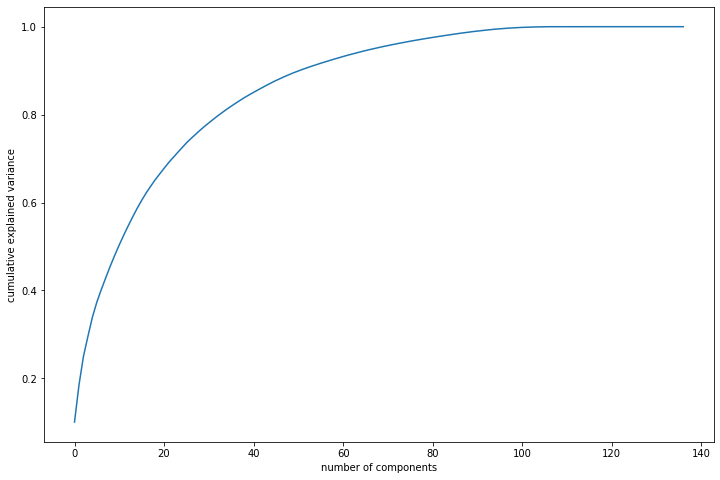

In [72]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Looks like 60 components are enough to describe 95% of the variance in the dataset**
- We'll choose 60 components for our modeling

In [0]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [74]:
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
X_train_pca.shape

(20993, 60)

In [75]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.01135065299865993 , min corr:  -0.010270232227327918


**There is indeed no correlation between the principal components.**

In [76]:
#Applying selected components to the test data - 60 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8998, 60)

## Model Building

#### Apply Logistic Regression algorithm on PCA dataset:

Since we have earlier seen that the dataset is imbalanced with a very low number of churn customers, we will use appropriate class weights to handle class imbalance.

In [77]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Making prediction on the test data
y_pred = lr.predict(X_test_pca)
y_pred[:5]

array([0, 0, 1, 0, 0])

In [79]:
print("Accuracy:{}".format(accuracy_score(y_test,y_pred)))

Accuracy:0.8100689042009336


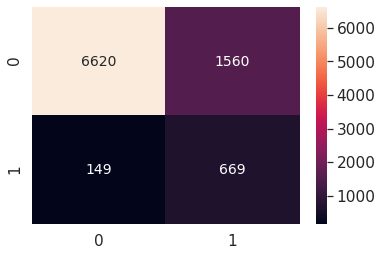

In [80]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [0]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))

Sensitivity:0.818
Specificity:0.809


In [83]:
pred_probs_test = lr.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))

AUC:0.88


**Plotting the ROC curve**

In [0]:

from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

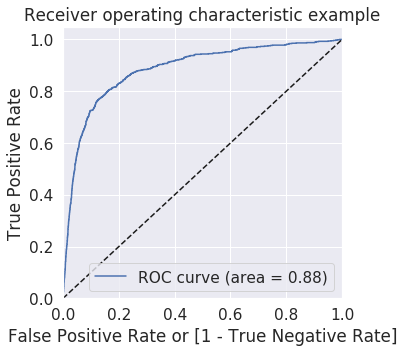

In [85]:
draw_roc(y_test, pred_probs_test)

#### Apply Decision Tree Algorithm on PCA dataset:

In [86]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
dt_default = DecisionTreeClassifier(class_weight={0:0.08,1:0.92})
dt_default.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [0]:
# Making predictions
y_pred = dt_default.predict(X_test_pca)

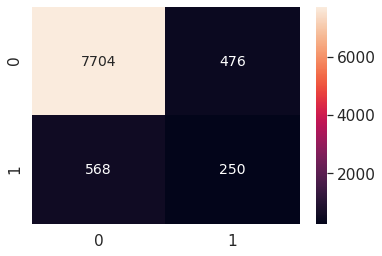

In [88]:
# plot confusion matrix for overview
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [0]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.306
Specificity:0.942
Accuracy:0.884


We are getting very low value of sensitivity using the default model of decision tree. 

**Hyperparameter Tuning on this**

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.08,1:0.92})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1,scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [92]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [0]:
# scores of GridSearch CV
scores = grid_search.cv_results_
# pd.DataFrame(scores).head()

In [94]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.1,1:0.9},max_depth=10,min_samples_leaf=100,min_samples_split=50,criterion='gini')

# Fit the grid search to the data
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [0]:
# Making predictions
y_pred = dtree.predict(X_test_pca)

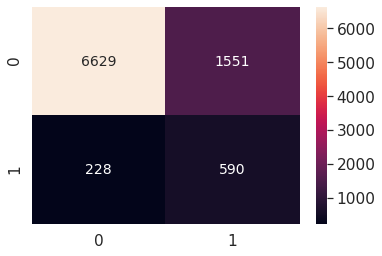

In [96]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [0]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.721
Specificity:0.81
Accuracy:0.802


In [99]:
pred_probs_test = dtree.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.83


We can see that the sensitivity value has significantly improved by tuning.

#### Apply Random Forest algorithm on PCA dataset:

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.08,1:0.92})

In [101]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
# Making predictions
y_pred = rfc.predict(X_test_pca)

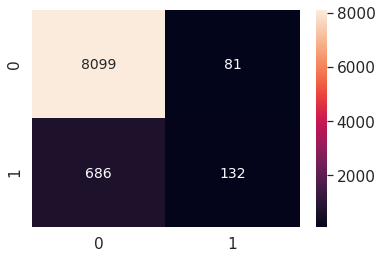

In [103]:
# plot the confusion matrix for overview
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [0]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.161
Specificity:0.99
Accuracy:0.915


In [106]:
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.88


**Hyperparameter Tuning**

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.08,1:0.92})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='recall')

In [108]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 26.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                     

In [109]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.790075233970958 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 100}


In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300,
                             class_weight={0:0.08,1:0.92})

In [111]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [112]:
# Making predictions
y_pred = rfc.predict(X_test_pca)
y_pred[:5]

array([0, 1, 1, 0, 0])

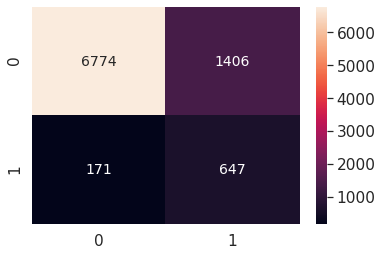

In [113]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [114]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[6774 1406]
 [ 171  647]]


In [115]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.791
Specificity:0.828
Accuracy:0.825


In [116]:
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.87


### Inference from Churn Prediction :
- Handling missing values (approx 75% max) according to business requirement
- Derived features & filtered High value customer(70th percentile) **After filtering the high-value customers,we get about 29991 observation**
- Created **Target variable to tag churners & remove attributes of the churn phase & get( Non-churn= 27401, churn= 2590)** this is called class-imbalance so we handle the class imbalance & tuned them accordingly

- We did PCA to perform dimensionality reduction technique on the dataset and and then build different types of predictive models

By comparing the various model performance and considering the metrics Sensitivity is important in this case, we can conclude that the best performing model is Logistic Regression.

Below is a comaprison of the metrics obtained from different classification models on test data:

** --Model --

**Logistic Regression**
- Accuracy = 89%
- Sensitivity = 93%
- Specificity = 88%
- AUC = 96%

**Decision Tree**
- Accuracy  =  81%  
- Sensitivity = 70%
- Specificity = 82%
- AUC = 84%

**Random Forest**
- Accuracy  =   83%  
- Sensitivity =  81%
- Specificity =  83%
- AUC = 89%



## Model Building for Identifying Important Predictors :

We will now build model to derive the important feature variables that are responsible for churn. We will re-utilise the X_train and X_test dataset we had earlier created.

In [117]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,-0.354294,-0.308665,-0.578787,-0.601652,-0.534860,-0.521335,-0.489266,-0.253146,-0.615708,-0.221567,-0.181399,-0.177109,-0.24537,-0.224166,-0.197032,-0.341358,-0.276417,-0.327442,0.003537,0.387144,-0.385253,-0.133197,0.774764,-0.140648,-0.247582,-0.193670,-0.227944,-0.218007,0.117183,-0.462175,-0.450231,-0.430036,-0.387276,-0.492098,-0.492349,-0.432665,-0.124470,0.109551,-0.160160,-0.641177,...,-0.113332,-0.043808,-0.734475,-0.532564,-0.447464,0.017664,-0.026952,0.340301,0.290035,-0.263275,-0.042107,-0.046384,0.218394,0.162247,0.143079,2.306917,2.209042,2.442513,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-1.011807,0.338777,0.660181,-0.005427,-0.133031,-0.373456,-0.251919,-0.399941,-0.006014,-0.399858,-0.775276,-0.376471,-0.600736
1,0.489221,-0.185431,-0.705682,1.681558,0.503425,-0.561263,-0.443207,-0.400011,-0.786413,-0.221567,-0.181399,-0.177109,-0.24537,-0.224166,-0.197032,-0.226728,-0.211448,-0.356732,-0.350704,-0.390264,-0.722391,-0.230678,-0.285379,-0.314954,-0.247582,-0.193670,-0.227944,-0.385199,-0.407135,-0.706317,2.052727,0.703013,-0.416093,-0.246065,-0.228083,-0.432665,0.872536,2.004985,-0.160160,1.241440,...,-0.356293,0.216790,0.042904,-0.746259,-0.652684,0.017664,-0.441457,0.579293,-0.498354,7.356559,-0.276744,6.291264,-0.312790,-0.328412,-0.316718,2.306917,-0.339003,2.442513,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-0.863342,-0.332141,-0.332283,-0.309935,-0.133031,0.170571,-0.251919,0.084648,-0.238961,0.083460,-0.775276,-0.376471,-0.600736
2,-0.563196,-0.412893,-0.207434,-0.455698,-0.284718,-0.351908,0.159041,0.022831,0.656385,-0.221567,-0.169157,-0.177109,-0.24537,-0.215748,-0.197032,-0.349585,-0.315284,-0.211238,-0.154694,0.208037,0.344591,-0.304117,-0.302962,-0.243868,0.734346,-0.128562,0.425936,-0.337256,-0.090883,0.072533,-0.281158,-0.121948,-0.260507,0.335991,-0.025459,0.590341,-0.159240,-0.152869,0.512892,0.034105,...,-0.356293,-0.103035,-0.734475,-0.746259,-0.652684,1.369362,0.387553,0.003541,-0.262861,-0.282153,-0.276744,-0.247373,-0.312790,-0.328412,-0.316718,-0.333567,-0.339003,-0.321227,1.990377,0.716927,1.275963,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-0.669826,-0.332141,-0.332283,-0.309935,-0.133031,-0.549776,0.251545,-0.557688,0.925773,-0.553022,1.289864,-0.376471,-0.600736
3,-0.963323,-0.347896,-0.021850,0.339932,0.611030,0.382958,-0.813547,-0.648262,-0.545470,-0.221567,-0.181399,-0.177109,-0.24537,-0.224166,-0.197032,1.491679,2.054765,1.523243,-0.600196,-0.327661,-0.255718,-0.229367,0.056852,-0.108513,0.437184,-0.193670,-0.227944,0.520323,1.134277,0.796921,-0.459363,-0.462191,-0.396372,-0.490249,-0.492349,-0.425685,-0.159240,-0.152869,-0.160160,-0.646818,...,-0.113332,-0.043808,-0.522463,-0.247636,-0.310651,0.017664,0.387553,-0.360378,0.458975,-0.008

In [118]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_goodmonths,mins_call,total_amt_rech_6_7,total_rech_data_6_7,avg_rech_goodMonths,cust_group_New,cust_group_Old,cust_group_Very Old
0,1.308890,-1.365152,0.652123,0.823596,-0.629274,0.523830,1.948153,-0.870342,2.245536,-0.018411,-0.069004,-0.170073,1.009200,-0.171235,-0.197032,-0.196118,-0.394330,-0.335146,-0.167907,-0.756928,0.008361,-0.304117,-0.302962,-0.314954,-0.247582,-0.193670,-0.227944,-0.250412,-0.763773,-0.225187,1.019293,-0.462191,0.798691,2.077974,-0.492349,2.604667,0.701921,-0.152869,-0.16016,2.113691,...,-0.963693,0.045032,0.170111,-0.746259,0.236600,-0.432902,-0.441457,-0.496169,-0.498354,-0.283885,-0.276744,-0.253749,-0.31279,-0.328412,-0.316718,-0.333567,-0.339003,-0.321227,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,0.032564,-0.332141,-0.332283,-0.309935,-0.133031,-0.033981,-0.251919,-0.172967,-0.471908,-0.175217,-0.775276,2.656246,-0.600736
1,-1.040932,0.516461,-1.241497,-0.639795,-0.630481,-0.572591,-0.843949,-0.689841,-0.785306,-0.156933,-0.181399,-0.177109,-0.229393,-0.224166,-0.197032,-0.399320,-0.394330,-0.379712,-0.713054,-0.697988,-0.722391,-0.304117,-0.302962,-0.314954,-0.247582,-0.193670,-0.227944,-0.734992,-0.725826,-0.720899,-0.459363,-0.462191,-0.416093,-0.455459,-0.314198,-0.431402,-0.159240,-0.152869,-0.16016,-0.623230,...,1.548737,0.524770,0.883887,2.494789,1.057478,-0.432902,-0.026952,-0.496169,1.830977,-0.283885,-0.207706,-0.253749,-0.31279,-0.039528,-0.316718,-0.333567,-0.339003,-0.321227,-0.295243,-0.307715,-0.328135,-0.303549,1.353618,-0.2998,-0.160064,-0.157484,-0.142535,-1.046619,4.225847,0.127829,0.069401,0.717921,-0.294143,-0.251919,-0.536125,-0.238961,-0.537139,-0.775276,-0.376471,-0.600736
2,0.189911,0.749316,0.090374,-0.138411,-0.145344,1.156250,1.985353,3.603589,-0.217438,-0.221567,-0.181399,-0.177109,-0.245370,-0.224166,-0.197032,-0.392722,-0.391827,-0.363914,-0.616414,-0.588018,-0.645403,-0.304117,-0.302962,-0.314954,-0.247582,-0.193670,-0.227944,-0.667403,-0.653389,-0.661631,0.101114,0.079292,1.529784,2.733550,4.395791,0.124279,-0.159240,-0.152869,-0.16016,1.918651,...,-0.356293,-0.185953,0.042904,-0.746259,0.024540,-0.432902,-0.441457,-0.496169,-0.498354,-0.283885,-0.276744,-0.253749,-0.31279,-0.328412,-0.316718,-0.333567,-0.339003,-0.321227,-0.295243,-0.307715,-0.328135,-0.303549,-0.301487,-0.2998,-0.160064,-0.157484,-0.142535,-0.984162,-0.332141,-0.332283,-0.309935,-0.133031,0.529615,-0.251919,0.620306,-0.471908,0.617834,-0.775276,-0.376471,-0.600736
3,-0.155948,0.172218,-0.077779,-0.115174,0.098389,-0.018116,-0.307495,-0.185375,-0.277894,-0.221567,-0.181399,-0.177109,-0.245370,-0.224166,-0.197032,0.613266,1.043492,0.745070,0.289739,0.317840,0.266007,0.073131,0.563764,0.351109,-0.247582,-0.193670,-0.227944,0.576270,0.921226,0.662864,-0.459363,-0.462191,-0.416093,-0.492098,-0.485528,-0.431093,0.496536,2.512897,-0.16016,-0.634694,...,-0.245856,-0.185953,0.113575,0.179755,0.236600,-0.432902,-0.441457,-0.496169,-0.498354,-0.2838

In [119]:
print(X_train.shape)
print(X_test.shape)

(20993, 137)
(8998, 137)


We will go with a tree based model to identify the important predictor variables.

**Random Forest Classifier:**

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.08,1:0.92})

In [121]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
# Making predictions
y_pred = rfc.predict(X_test)

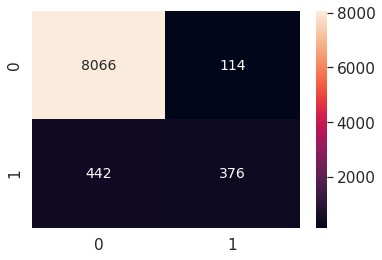

In [123]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [0]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.46
Specificity:0.986
Accuracy:0.938


In [126]:
pred_probs_test = rfc.predict_proba(X_test)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.92


The model perform poor for the default model. Let's try tuning the hypeparameters to improve the model performance.

**Hyperparameter Tuning**

In [0]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [100,200,300,500], 
    'max_features': [5,10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.08,1:0.92})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='recall')

In [128]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 27.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                     

In [129]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'n_estimators': 100}

In [0]:
 # model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=8,
                             min_samples_leaf=200, 
                             min_samples_split=300,
                             max_features=10,
                             n_estimators=100,
                             class_weight={0:0.08,1:0.92})

In [131]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=300, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [132]:
# Making predictions
y_pred = rfc.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

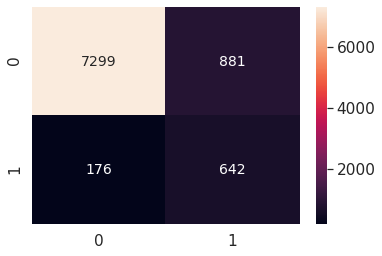

In [133]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [0]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.785
Specificity:0.892
Accuracy:0.883


In [136]:
pred_probs_test = rfc.predict_proba(X_test)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.91


Now the model metrics are quite satisfactory. Let's now proceed with identifying important predictor variables.

### Feature Importances:

In [137]:
# Print the name and gini importance of each feature
feat_labels = X_train.columns
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('arpu_6', 0.002401287922978273)
('arpu_7', 0.0032860369328304097)
('arpu_8', 0.03328323498599264)
('onnet_mou_6', 0.0014208354898880204)
('onnet_mou_7', 0.000852470421586246)
('onnet_mou_8', 0.024782915308221954)
('offnet_mou_6', 0.0012721997097316295)
('offnet_mou_7', 0.0014728631393367178)
('offnet_mou_8', 0.014742876799398376)
('roam_ic_mou_6', 0.00013783155632017186)
('roam_ic_mou_7', 0.0013569211583437163)
('roam_ic_mou_8', 0.037189191469234516)
('roam_og_mou_6', 0.00015751729766357874)
('roam_og_mou_7', 0.0007426121367306942)
('roam_og_mou_8', 0.03732348704693954)
('loc_og_t2t_mou_6', 0.0016589731152027618)
('loc_og_t2t_mou_7', 0.004049799334103047)
('loc_og_t2t_mou_8', 0.04610091504352019)
('loc_og_t2m_mou_6', 0.0016301024818832963)
('loc_og_t2m_mou_7', 0.005963107651980678)
('loc_og_t2m_mou_8', 0.04282491737313893)
('loc_og_t2f_mou_6', 0.003656316431772503)
('loc_og_t2f_mou_7', 0.0016435142551463298)
('loc_og_t2f_mou_8', 0.012109387934189949)
('loc_og_t2c_mou_6', 0.0)
('loc_og

In [138]:
feature_df = pd.concat([pd.Series(feat_labels),pd.Series(rfc.feature_importances_)],axis=1).rename(columns={0:'Features',1:'Weight'})
feature_df.head(10)

,Features,Weight
0,arpu_6,0.002401
1,arpu_7,0.003286
2,arpu_8,0.033283
3,onnet_mou_6,0.001421
4,onnet_mou_7,0.000852
5,onnet_mou_8,0.024783
6,offnet_mou_6,0.001272
7,offnet_mou_7,0.001473
8,offnet_mou_8,0.014743
9,roam_ic_mou_6,0.000138


In [139]:
# Top 10 features
top_10 = feature_df.sort_values('Weight',ascending=False).head(11)
top_10

,Features,Weight
65,loc_ic_mou_8,0.112419
80,total_ic_mou_8,0.069029
95,total_rech_amt_8,0.068320
29,loc_og_mou_8,0.066495
53,total_og_mou_8,0.051347
101,last_day_rch_amt_8,0.050139
59,loc_ic_t2m_mou_8,0.046486
17,loc_og_t2t_mou_8,0.046101
56,loc_ic_t2t_mou_8,0.045882
20,loc_og_t2m_mou_8,0.042825


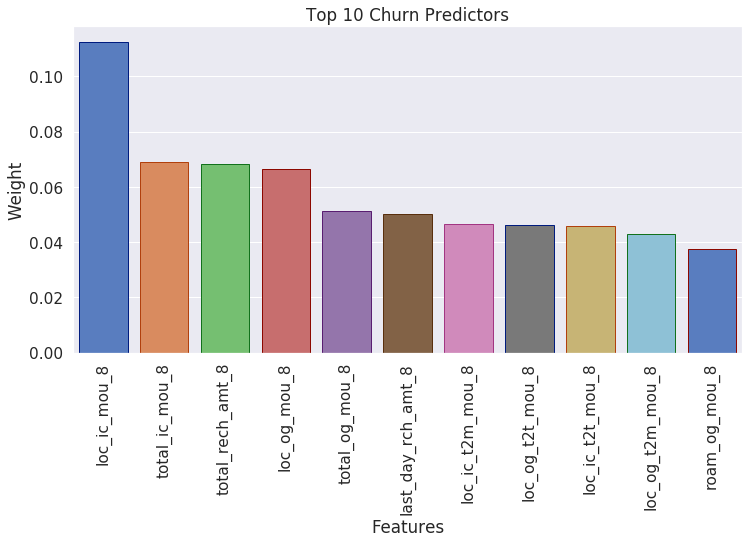

In [140]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data = top_10, x='Features', y='Weight',palette='muted',edgecolor=sns.color_palette('dark',7))
ax.set_title("Top 10 Churn Predictors")
plt.xticks(rotation=90)
plt.show()

### Identifying Important Predictors :

From the bar chart and word cloud it is clearly evident that the most important predictor variables are total incoming minutes of usage,local-incoming MOU, total recharge amount etc. on the third month i.e action phase. So it can be generalize that the customer footprint on the action phase plays a vital role in deciding whether the customer will churn or not. 

## Conclusion :

In the action phase the customer experience starts to sore and the customers get compelling offers from competitors, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the 'good' months.

From the important predictors we could see that the customer footprint in this action phase plays a major role behind churn. If the customer is having high incoming calls, doing recharges etc., chances are less likely that the customer will churn.

Based on the analysis and predictions the following strategies can be taken to reduce the churn rate :

- Introduce personalized offers for the customers
- Identify the most valuable customers and communicate with them to see if they are having any concerns.
- Provide better customer service
- Monitor the usage of the high value customers, active customers are less likely to churn.